In [1]:
import pandas as pd
import numpy as np
import seaborn
import folium

In [2]:
import geopandas as gpd

In [3]:
import contextily as cx
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
oil = pd.read_csv('data/kern_county_oil.csv')
oil.head(10)

LeaseName            WellDesign WellStatus  \
0                    Southern Pacific  Southern Pacific 11H   Canceled   
1                             Siegfus        Siegfus 31X-22   Canceled   
2                    Southern Pacific   Southern Pacific 5H   Canceled   
3                    Southern Pacific   Southern Pacific 6H   Canceled   
4                    Southern Pacific   Southern Pacific 7H   Canceled   
5  Lease by Stockdale Oil & Gas, Inc.                  UC75   Canceled   
6                             Siegfus         Siegfus USC-2   Canceled   
7                    Southern Pacific  Southern Pacific 10H       Idle   
8                             Siegfus           Siegfus 122       Idle   
9                             Siegfus            Siegfus 1H       Idle   

  WellType WellTypeLa                                   OperatorNa  \
0       OG  Oil & Gas  California Resources Production Corporation   
1       OG  Oil & Gas  California Resources Production Corporation   
2       OG  Oil & Gas                    Stockdale Oil & Gas, Inc.   
3       OG  Oil & Gas                    Stockdale Oil & Gas, Inc.   
4       OG  Oil & Gas                    Stockdale Oil & Gas, Inc.   
5       OG  Oil & Gas                    Stockdale Oil & Gas, Inc.   
6       OG  Oil & Gas                    Stockdale Oil & Gas, Inc.   
7       OG  Oil & Gas  California Resources Production Corporation   
8       OG  Oil & Gas  California Resources Production Corporation   
9       OG  Oil & Gas  California Resources Production Corporation   

         Place CountyName   Latitude   Longitude GISSource isDirectio  \
0  Kern County       Kern  35.401291 -118.860405  Operator          N   
1  Kern County       Kern  35.397495 -118.855888  Operator          N   
2  Kern County       Kern  35.404583 -118.850471       mip          N   
3  Kern County       Kern  35.403610 -118.849937       mip          N   
4  Kern County       Kern  35.405106 -118.856483       mip          N   
5  Bakersfield       Kern  35.397018 -118.863434       mip          N   
6  Kern County       Kern  35.398052 -118.859688       mip          N   
7  Kern County       Kern  35.402748 -118.857201       GPS          N   
8  Kern County       Kern  35.397060 -118.860001       GPS          N   
9  Kern County       Kern  35.393887 -118.860725       GPS          N   

   WellSymbol  
0  CanceledOG  
1  CanceledOG  
2  CanceledOG  
3  CanceledOG  
4  CanceledOG  
5  CanceledOG  
6  CanceledOG  
7      IdleOG  
8      IdleOG  
9      IdleOG

In [5]:
oil.columns.to_list()

['LeaseName',
 'WellDesign',
 'WellStatus',
 'WellType',
 'WellTypeLa',
 'OperatorNa',
 'Place',
 'CountyName',
 'Latitude',
 'Longitude',
 'GISSource',
 'isDirectio',
 'WellSymbol']

In [6]:
oilsubset = oil[['WellStatus', 'OperatorNa', 'WellTypeLa','Latitude','Longitude','WellSymbol']]
oilsubset.head()

WellStatus                                   OperatorNa WellTypeLa  \
0   Canceled  California Resources Production Corporation  Oil & Gas   
1   Canceled  California Resources Production Corporation  Oil & Gas   
2   Canceled                    Stockdale Oil & Gas, Inc.  Oil & Gas   
3   Canceled                    Stockdale Oil & Gas, Inc.  Oil & Gas   
4   Canceled                    Stockdale Oil & Gas, Inc.  Oil & Gas   

    Latitude   Longitude  WellSymbol  
0  35.401291 -118.860405  CanceledOG  
1  35.397495 -118.855888  CanceledOG  
2  35.404583 -118.850471  CanceledOG  
3  35.403610 -118.849937  CanceledOG  
4  35.405106 -118.856483  CanceledOG

In [7]:
oilsubset = oilsubset[oilsubset.WellStatus != 'Canceled']


In [8]:
oilsubset = oilsubset[oilsubset.WellStatus != 'Unknown']


In [9]:
oilsubset = oilsubset[oilsubset.WellStatus != 'Plugged']


In [10]:
oilsubset = oilsubset[oilsubset.WellStatus != 'PluggedOnly']


In [11]:
oilsubset = oilsubset.loc[oilsubset['WellTypeLa'] == 'Oil & Gas'] #subsets to just oil and gas data

In [12]:
well_count = oilsubset.value_counts(['WellStatus']).reset_index(name="count")
well_count

WellStatus  count
0     Active  23491
1       Idle  16718
2        New   1337

In [13]:
oilsubset.sample(10)
oilsubset.shape

(41546, 6)

In [14]:
px.scatter_mapbox(oilsubset,
                  lat="Latitude",
                  lon="Longitude",
                  mapbox_style="carto-positron"
                 )


<AxesSubplot: xlabel='WellStatus'>

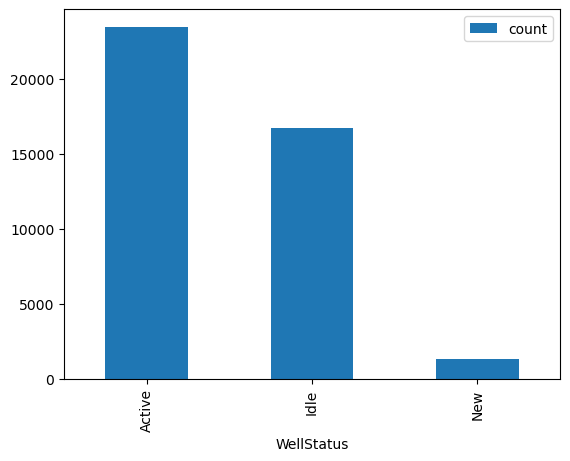

In [15]:
well_count.plot.bar(x='WellStatus')


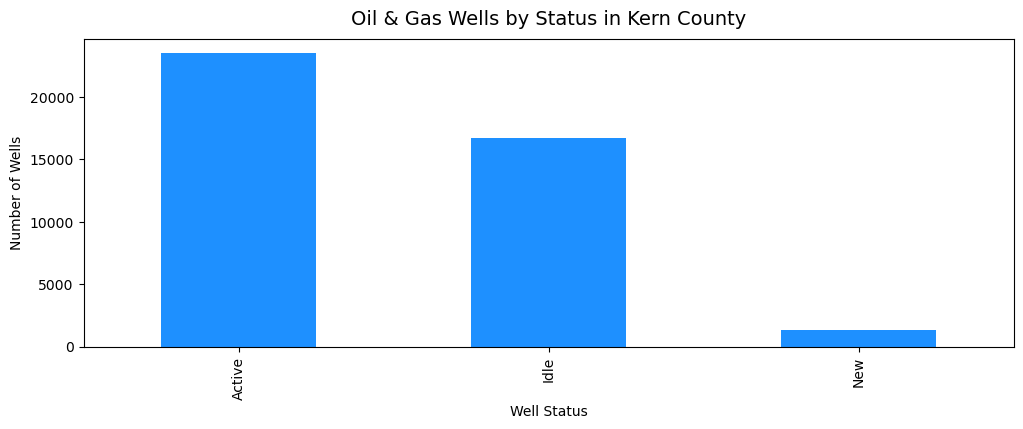

In [16]:
fig, ax = plt.subplots(figsize=(12,4))

well_count.plot.bar(ax=ax,
                                      x='WellStatus',
                                      y='count',
                                      legend=False,
                                      color='dodgerblue'
                                      )
ax.set_xlabel('Well Status') # override x label
ax.set_ylabel('Number of Wells') # override y label
ax.set_title("Oil & Gas Wells by Status in Kern County",fontsize=14,pad=10); # multi-line title with padding

In [20]:
operator_count = oilsubset.value_counts(['OperatorNa']).reset_index(name="count")
operator_count

OperatorNa  count
0                                Aera Energy LLC  13808
1            California Resources Elk Hills, LLC   6327
2                            Chevron U.S.A. Inc.   4666
3    California Resources Production Corporation   3500
4                   Berry Petroleum Company, LLC   3268
..                                           ...    ...
177      Frogville Exploration & Development LLC      1
178               Freeport-McMoRan Oil & Gas LLC      1
179                            Prine Oil Company      1
180                           Forest Gray Energy      1
181                          Central Lease, Inc.      1

[182 rows x 2 columns]

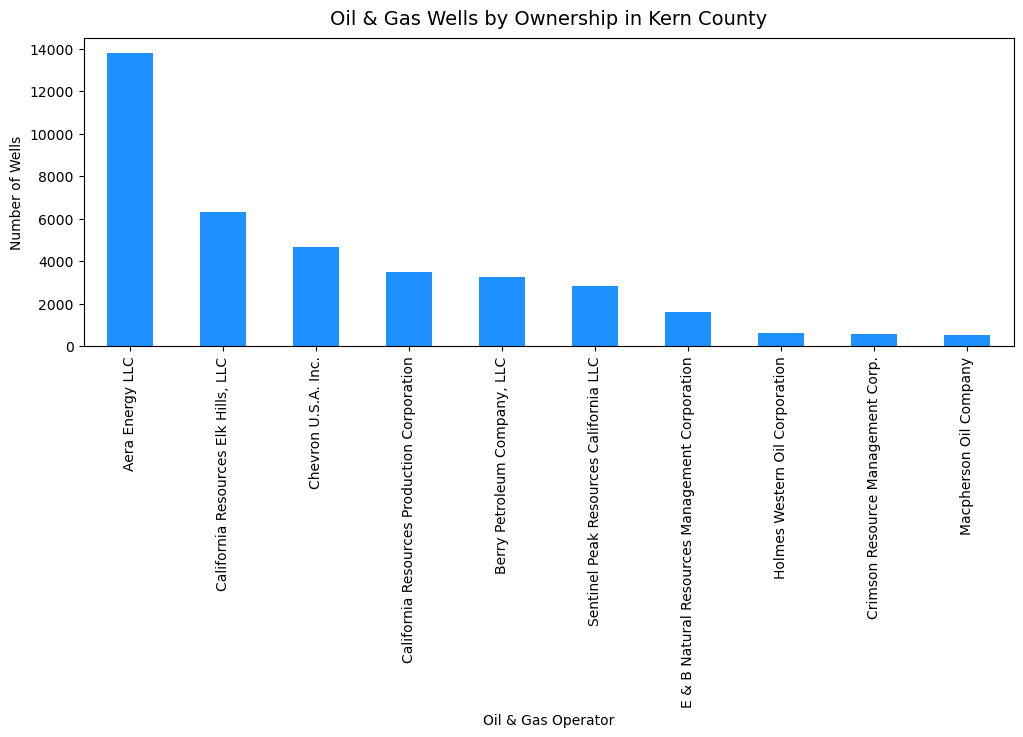

In [24]:
fig, ax = plt.subplots(figsize=(12,4))

operator_count[:10].plot.bar(ax=ax,
                                      x='OperatorNa',
                                      y='count',
                                      legend=False,
                                      color='dodgerblue'
                                      )
ax.set_xlabel('Oil & Gas Operator') # override x label
ax.set_ylabel('Number of Wells') # override y label
ax.set_title("Oil & Gas Wells by Ownership in Kern County",fontsize=14,pad=10); # multi-line title with padding

In [19]:
oilsubset.sample()

WellStatus       OperatorNa WellTypeLa  Latitude   Longitude WellSymbol
20297     Active  Aera Energy LLC  Oil & Gas  35.44949 -119.706909   ActiveOG

In [25]:
operator_count.head(10)

OperatorNa  count
0                                 Aera Energy LLC  13808
1             California Resources Elk Hills, LLC   6327
2                             Chevron U.S.A. Inc.   4666
3     California Resources Production Corporation   3500
4                    Berry Petroleum Company, LLC   3268
5          Sentinel Peak Resources California LLC   2811
6  E & B Natural Resources Management Corporation   1584
7                  Holmes Western Oil Corporation    622
8               Crimson Resource Management Corp.    561
9                          Macpherson Oil Company    518

In [36]:
#top ten oil companies own 37,665 of the active, idle, and new oil & gas wells.
oil10 = operator_count[:10]['count'].sum(axis=0)
oil10

37665

In [34]:
#total oil & gas wells in subsetted dataset
operator_count['count'].sum()

41546

In [35]:
#ten oil companies own 90% of wells 
37665/41546

0.9065854715255379

In [39]:
#top 5 oil companies
oil5 = operator_count[:5]['count'].sum(axis=0)
oil5

31569

In [40]:
#top 5 oil companies own 76% of wells 
31569/41546

0.7598565445530255

In [41]:
#Aera Energy LLC owns 1/3 of the wells 
13808/41546

0.33235449862802674